In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import io
import openox as ox
from exclude_unclean import *
from session_functions import threesamples, recalculate_so2_range
from importlib import reload
import os


In [4]:
abg = pd.read_csv('../OpenOxPHIData/output_internal_bloodgas.csv')
threesamples(abg)
abg = abg[['date','time_calc','sample','so2','session']]


In [5]:
base_path = '../OpenOxPHIData/waveforms/labview_2hz/'
pattern = 'labview_session_{}_2hz.csv'
cols_to_summarize = ['Masimo 97/SpO2','Nellcor/SpO2'] 
labview_files = ox.get_labview_files(abg, base_path, pattern)
labview_samples = ox.extract_values_by_sample(labview_files, 'session','Sample',5,cols_to_summarize,abg)

/wynton/protected/home/law/lawtj/projects/openox/lipnick_session_streamlit/openox/__init__.py:273: RuntimeWarning: invalid value encountered in cast
  for i in abg['session'].unique().astype(int):


No file for session 139 at ../OpenOxPHIData/waveforms/labview_2hz/labview_session_139_2hz.csv
No file for session -9223372036854775808 at ../OpenOxPHIData/waveforms/labview_2hz/labview_session_-9223372036854775808_2hz.csv
No file for session 17 at ../OpenOxPHIData/waveforms/labview_2hz/labview_session_17_2hz.csv
No file for session 74 at ../OpenOxPHIData/waveforms/labview_2hz/labview_session_74_2hz.csv
No file for session 412 at ../OpenOxPHIData/waveforms/labview_2hz/labview_session_412_2hz.csv
No file for session 417 at ../OpenOxPHIData/waveforms/labview_2hz/labview_session_417_2hz.csv
extracting labview values.....


In [6]:
#set everything to keep to start
labview_samples['manual_clean_so2'] = 'keep'
labview_samples['manual_clean_masimo'] = 'keep'
labview_samples.head()

,session,sample,Masimo 97/SpO2,Nellcor/SpO2,so2,Timestamp,manual_clean_so2,manual_clean_masimo
0,13,1,100.0,100.000000,99.4,09:33:02,keep,keep
1,13,2,100.0,100.000000,98.9,09:34:06,keep,keep
2,13,3,100.0,98.090909,98.6,09:34:46,keep,keep
3,13,4,100.0,99.818182,99.0,09:35:19,keep,keep
4,13,5,100.0,100.000000,98.8,09:35:56,keep,keep


In [7]:
reload(ox)
labview_samples, counts = ox.sample_stability_multi(labview_samples, 'so2','Nellcor/SpO2', 'Timestamp','algo',1.5,2)
labview_samples

/wynton/protected/home/law/lawtj/projects/openox/lipnick_session_streamlit/openox/__init__.py:350: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[timestamp_col] = pd.to_datetime(df[timestamp_col], errors='coerce')


,session,sample,Masimo 97/SpO2,Nellcor/SpO2,so2,Timestamp,manual_clean_so2,manual_clean_masimo,sample_diff_prev,sample_diff_next,...,Nellcor/SpO2_diff_prev,Nellcor/SpO2_diff_next,Timestamp_diff_prev,Timestamp_diff_next,so2_stable,so2_reason,Nellcor_stable,Nellcor_reason,algo_status,algo
0,13,1,100.000000,100.000000,99.40,2024-05-09 09:33:02,keep,keep,0.0,-1.0,...,0.000000,0.000000,0.0,-64.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
1,13,2,100.000000,100.000000,98.90,2024-05-09 09:34:06,keep,keep,1.0,-1.0,...,0.000000,1.909091,64.0,-40.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
2,13,3,100.000000,98.090909,98.60,2024-05-09 09:34:46,keep,keep,1.0,-1.0,...,-1.909091,-1.727273,40.0,-33.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
3,13,4,100.000000,99.818182,99.00,2024-05-09 09:35:19,keep,keep,1.0,-1.0,...,1.727273,-0.181818,33.0,-37.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
4,13,5,100.000000,100.000000,98.80,2024-05-09 09:35:56,keep,keep,1.0,-1.0,...,0.181818,3.909091,37.0,-389.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378,490,21,82.000000,81.000000,79.10,2024-05-09 16:28:36,keep,keep,1.0,-1.0,...,0.000000,6.000000,22.0,-161.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
6379,490,22,76.909091,75.000000,73.05,2024-05-09 16:31:17,keep,keep,1.0,-1.0,...,-6.000000,0.818182,161.0,-22.0,True,keep because next sample is within bound,True,keep because next sample is within bound,True,keep
6380,490,23,76.272727,74.181818,72.30,2024-05-09 16:31:39,keep,keep,1.0,-1.0,...,-0.818182,1.181818,22.0,-24.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
6381,490,24,75.545455,73.000000,72.15,2024-05-09 16:32:03,keep,keep,1.0,-1.0,...,-1.181818,-0.181818,24.0,-23.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep


In [8]:
arange = np.arange(1.25,3,0.25)
print(arange)
sensitivity_analysis = {}

for so2bound in arange:
    print('starting so2bound:', so2bound)
    for refbound in arange:
        print('starting refbound:', refbound)
        df, value_counts = ox.sample_stability_multi(labview_samples, 'so2','Nellcor/SpO2', 'Timestamp','algo',so2bound,refbound)
        sensitivity_analysis[(so2bound,refbound)] = value_counts

sensitivity_analysis 

[1.25 1.5  1.75 2.   2.25 2.5  2.75]
starting so2bound: 1.25
starting refbound: 1.25
starting refbound: 1.5
starting refbound: 1.75
starting refbound: 2.0
starting refbound: 2.25
starting refbound: 2.5
starting refbound: 2.75
starting so2bound: 1.5
starting refbound: 1.25
starting refbound: 1.5
starting refbound: 1.75
starting refbound: 2.0
starting refbound: 2.25
starting refbound: 2.5
starting refbound: 2.75
starting so2bound: 1.75
starting refbound: 1.25
starting refbound: 1.5
starting refbound: 1.75
starting refbound: 2.0
starting refbound: 2.25
starting refbound: 2.5
starting refbound: 2.75
starting so2bound: 2.0
starting refbound: 1.25
starting refbound: 1.5
starting refbound: 1.75
starting refbound: 2.0
starting refbound: 2.25
starting refbound: 2.5
starting refbound: 2.75
starting so2bound: 2.25
starting refbound: 1.25
starting refbound: 1.5
starting refbound: 1.75
starting refbound: 2.0
starting refbound: 2.25
starting refbound: 2.5
starting refbound: 2.75
starting so2bound: 2

{(1.25, 1.25): {'keep': 5467,
  'reject_nellcor': 390,
  'reject_both': 289,
  'reject_so2': 237},
 (1.25, 1.5): {'keep': 5574,
  'reject_nellcor': 283,
  'reject_so2': 266,
  'reject_both': 260},
 (1.25, 1.75): {'keep': 5651,
  'reject_so2': 282,
  'reject_both': 244,
  'reject_nellcor': 206},
 (1.25, 2.0): {'keep': 5688,
  'reject_so2': 298,
  'reject_both': 228,
  'reject_nellcor': 169},
 (1.25, 2.25): {'keep': 5783,
  'reject_so2': 367,
  'reject_both': 159,
  'reject_nellcor': 74},
 (1.25, 2.5): {'keep': 5799,
  'reject_so2': 388,
  'reject_both': 138,
  'reject_nellcor': 58},
 (1.25, 2.75): {'keep': 5813,
  'reject_so2': 396,
  'reject_both': 130,
  'reject_nellcor': 44},
 (1.5, 1.25): {'keep': 5560,
  'reject_nellcor': 437,
  'reject_both': 242,
  'reject_so2': 144},
 (1.5, 1.5): {'keep': 5676,
  'reject_nellcor': 321,
  'reject_both': 222,
  'reject_so2': 164},
 (1.5, 1.75): {'keep': 5758,
  'reject_nellcor': 239,
  'reject_both': 211,
  'reject_so2': 175},
 (1.5, 2.0): {'keep'

In [9]:
# Convert the dictionary to a list of dictionaries with separated keys and inner values
rows = [
    {'so2bound': k[0], 'refbound': k[1], **v}
    for k, v in sensitivity_analysis.items()
]

# Create a DataFrame from the list of dictionaries
sens = pd.DataFrame(rows)
sens['reject'] = sens['reject_nellcor'] + sens['reject_both'] + sens['reject_so2']
sens.to_csv('sens.csv')
sens

,so2bound,refbound,keep,reject_nellcor,reject_both,reject_so2,reject
0,1.25,1.25,5467,390,289,237,916
1,1.25,1.50,5574,283,260,266,809
2,1.25,1.75,5651,206,244,282,732
3,1.25,2.00,5688,169,228,298,695
4,1.25,2.25,5783,74,159,367,600
5,1.25,2.50,5799,58,138,388,584
6,1.25,2.75,5813,44,130,396,570
7,1.50,1.25,5560,437,242,144,823
8,1.50,1.50,5676,321,222,164,707
9,1.50,1.75,5758,239,211,175,625


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


/scratch/lawtj/ipykernel_1176828/2472859781.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, .9, 1])  # Adjust the rect to make room for the color bar


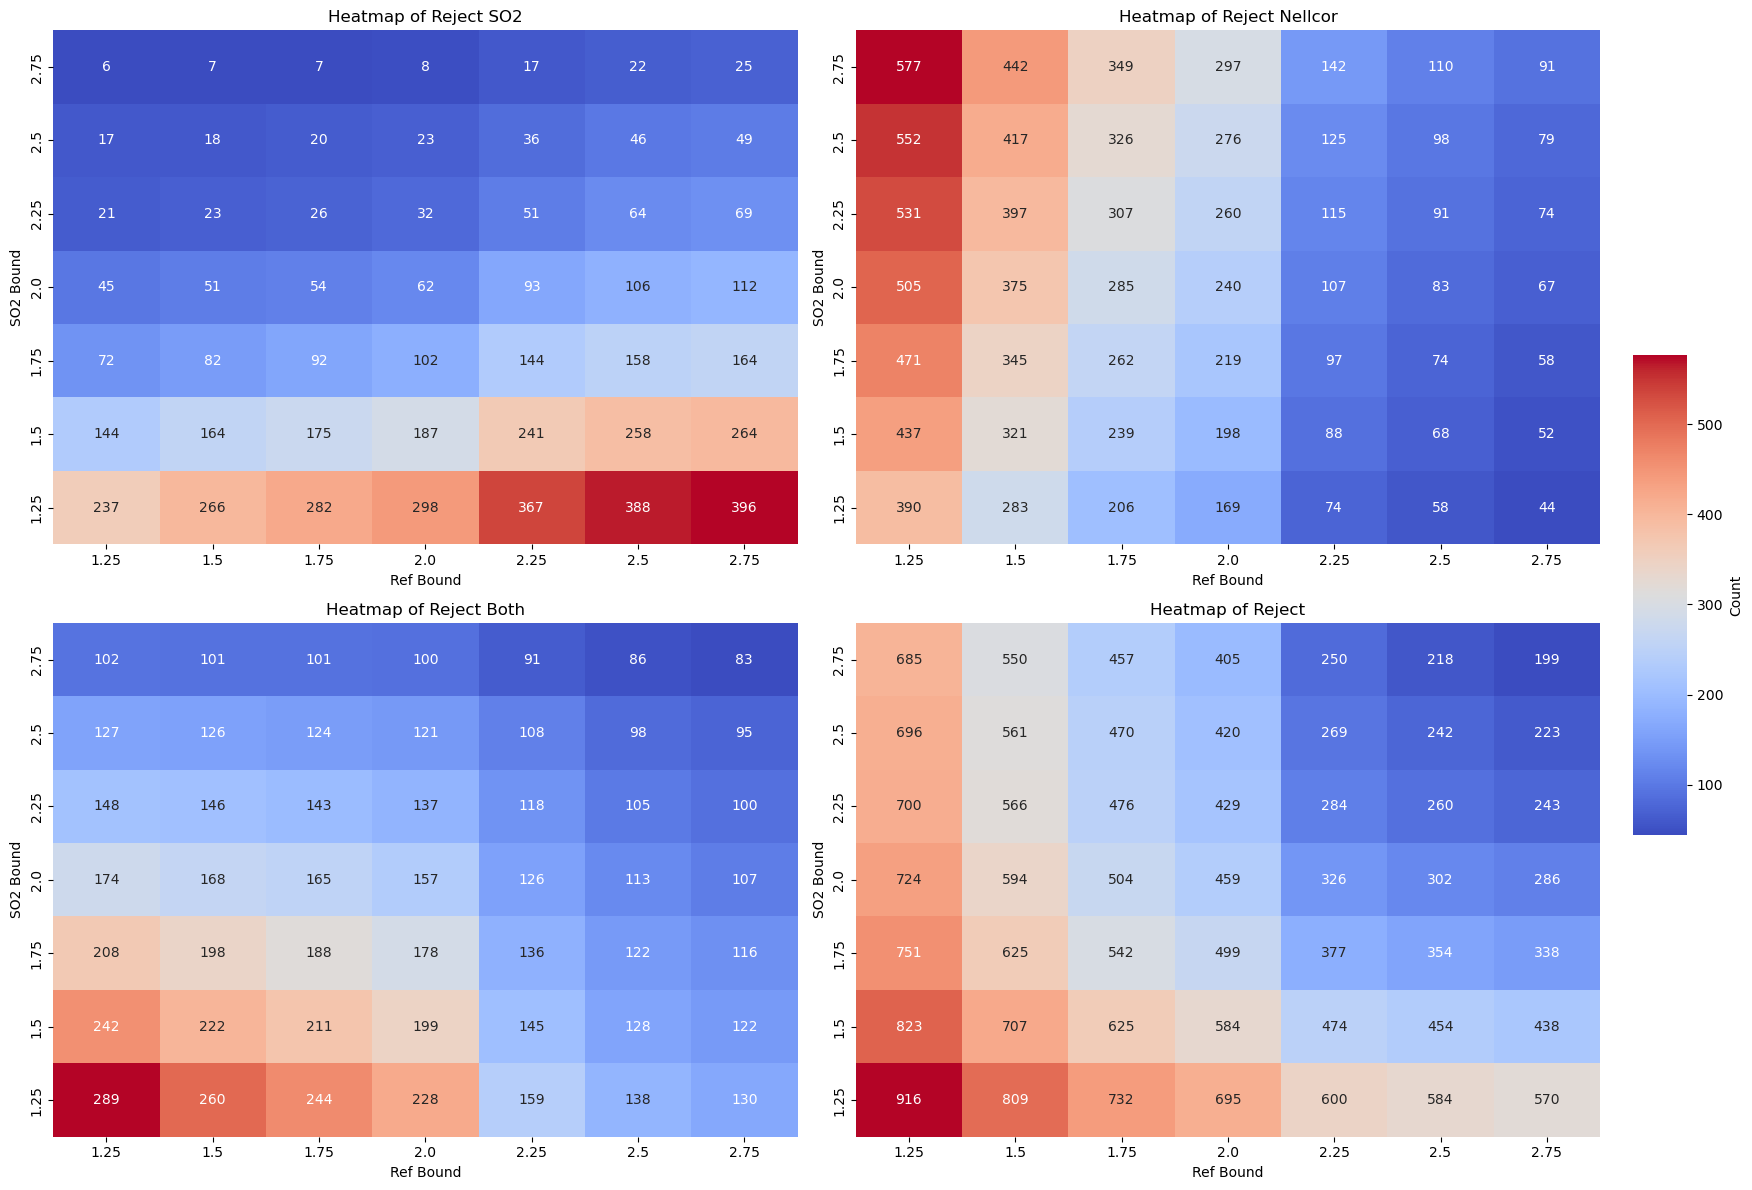

In [11]:
# Pivot the data for heatmap plotting using keyword arguments
pivot_table_so2 = sens.pivot(index="so2bound", columns="refbound", values="reject_so2")
pivot_table_nellcor = sens.pivot(index="so2bound", columns="refbound", values="reject_nellcor")
pivot_table_both = sens.pivot(index="so2bound", columns="refbound", values="reject_both")
pivot_table_reject = sens.pivot(index="so2bound", columns="refbound", values="reject")

# Create heatmaps in a 2x2 grid
fig, ax = plt.subplots(2, 2, figsize=(18, 12))

# Define a common color bar for all heatmaps
cbar_ax = fig.add_axes([.91, .3, .03, .4])

# Titles for each heatmap
titles = ['Reject SO2', 'Reject Nellcor', 'Reject Both', 'Reject']

# Mapping each pivot table with a title
for ax_coords, pivot_table, title in zip([(0, 0), (0, 1), (1, 0), (1, 1)],
                                         [pivot_table_so2, pivot_table_nellcor, pivot_table_both, pivot_table_reject],
                                         titles):
    i, j = ax_coords
    sns.heatmap(pivot_table, cmap='coolwarm',
                annot=True, ax=ax[i][j], fmt='d',
                cbar=i == 0 and j == 1, cbar_ax=None if not (i == 0 and j == 1) else cbar_ax,
                cbar_kws={'label': 'Count'})
    ax[i][j].set_title(f'Heatmap of {title}')
    ax[i][j].set_xlabel('Ref Bound')
    ax[i][j].set_ylabel('SO2 Bound')
    ax[i][j].invert_yaxis()

plt.tight_layout(rect=[0, 0, .9, 1])  # Adjust the rect to make room for the color bar
plt.show()

## Mark manually cleaned items from "drop dict" as 'rejected' in the manual clean columns

In [12]:
dothis = True

if dothis:
    for session in drop_dict:
        for sample in drop_dict[session]:
            labview_samples.loc[(labview_samples['session']==session) & (labview_samples['sample']==sample), 'manual_clean_so2'] = 'reject'

    for session in loc_dict:
        #access just the first item of the tuple
        for sample in loc_dict[session][0]:
            labview_samples.loc[(labview_samples['session']==session) & (labview_samples['sample']==sample), 'manual_clean_masimo'] = 'reject'

In [13]:
labview_samples.algo_status.value_counts()

algo_status
True     5799
False     584
Name: count, dtype: int64

In [14]:
labview_samples_post_algorithm = labview_samples.copy()
labview_samples_post_algorithm

,session,sample,Masimo 97/SpO2,Nellcor/SpO2,so2,Timestamp,manual_clean_so2,manual_clean_masimo,sample_diff_prev,sample_diff_next,...,Nellcor/SpO2_diff_prev,Nellcor/SpO2_diff_next,Timestamp_diff_prev,Timestamp_diff_next,so2_stable,so2_reason,Nellcor_stable,Nellcor_reason,algo_status,algo
0,13,1,100.000000,100.000000,99.40,2024-05-09 09:33:02,keep,keep,0.0,-1.0,...,0.000000,0.000000,0.0,-64.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
1,13,2,100.000000,100.000000,98.90,2024-05-09 09:34:06,keep,keep,1.0,-1.0,...,0.000000,1.909091,64.0,-40.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
2,13,3,100.000000,98.090909,98.60,2024-05-09 09:34:46,keep,keep,1.0,-1.0,...,-1.909091,-1.727273,40.0,-33.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
3,13,4,100.000000,99.818182,99.00,2024-05-09 09:35:19,keep,keep,1.0,-1.0,...,1.727273,-0.181818,33.0,-37.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
4,13,5,100.000000,100.000000,98.80,2024-05-09 09:35:56,keep,keep,1.0,-1.0,...,0.181818,3.909091,37.0,-389.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6378,490,21,82.000000,81.000000,79.10,2024-05-09 16:28:36,keep,keep,1.0,-1.0,...,0.000000,6.000000,22.0,-161.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
6379,490,22,76.909091,75.000000,73.05,2024-05-09 16:31:17,keep,keep,1.0,-1.0,...,-6.000000,0.818182,161.0,-22.0,True,keep because next sample is within bound,True,keep because next sample is within bound,True,keep
6380,490,23,76.272727,74.181818,72.30,2024-05-09 16:31:39,keep,keep,1.0,-1.0,...,-0.818182,1.181818,22.0,-24.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep
6381,490,24,75.545455,73.000000,72.15,2024-05-09 16:32:03,keep,keep,1.0,-1.0,...,-1.181818,-0.181818,24.0,-23.0,True,keep because previous sample is within bound,True,keep because previous sample is within bound,True,keep


Do some calculations on the rejected and kept samples

In [15]:
so2mask = labview_samples['so2_keep'] != labview_samples['manual_clean_so2']
masimomask = labview_samples['masimo_keep'] != labview_samples['manual_clean_masimo']
manualmask = labview_samples['manual_clean_so2'] == 'reject'
algomask = labview_samples['so2_keep'] == 'reject'
manualrjecets = set(labview_samples[manualmask].index)
algorejects = set(labview_samples[algomask].index)


print('numnber of samples rejected by manual cleaning: ', labview_samples[manualmask].shape[0])
print('number of samples rejected by algorithm: ', labview_samples[algomask].shape[0],'\n')
print('# samples rejected by both:', len(manualrjecets.intersection(algorejects)))
print('# samples rejected by manual but not algorithm:', len(manualrjecets.difference(algorejects)))
print('# samples rejected by algorithm but not manual:', len(algorejects.difference(manualrjecets)),'\n')

print(labview_samples['so2_keep'].value_counts(normalize=True),'\n')
print(labview_samples['manual_clean_so2'].value_counts(normalize=True),'\n')


KeyError: 'so2_keep'